## Get Data

In [1]:
import pandas as pd

df = pd.read_csv("../Data/cleaned_dataset.csv")
df

,Mean Temperature,Mean Pressure,Rainfall,Relative Humidity,Mean Cloud,Evaporation,Global Solar Radiation,Max UV,Wind Speed,Mean UV,...,RSP,O3,FSP,Intensity,Signal,Duration(hr min),day_sin,day_cos,wind_sin,wind_cos
0,15.4,1025.1,0.00,68.0,57.0,3.4,18.11,10.072187,6.730814,4.592663,...,43.0,0.0,31.0,0.0,0.0,0.0,0.999991,0.004304,0.173648,0.984808
1,16.6,1025.8,0.00,69.0,79.0,3.1,12.94,9.279723,8.470005,3.780165,...,57.0,0.0,37.0,0.0,0.0,0.0,0.999917,-0.012910,0.173648,0.984808
2,17.5,1023.0,0.00,69.0,53.0,4.0,20.32,10.851292,6.246643,5.183114,...,51.0,0.0,37.0,0.0,0.0,0.0,0.999546,-0.030120,0.173648,0.984808
3,18.5,1018.7,0.00,78.0,89.0,2.8,12.21,11.371977,10.663324,4.197858,...,53.0,-0.0,33.0,0.0,0.0,0.0,0.998880,-0.047321,0.342020,0.939693
4,19.7,1014.7,0.05,85.0,90.0,1.6,11.50,10.239657,11.126056,3.814848,...,54.0,-0.0,33.0,0.0,0.0,0.0,0.997917,-0.064508,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,27.3,1009.3,0.05,73.0,77.0,3.1,9.52,4.000000,12.200000,2.000000,...,24.0,65.0,18.0,0.0,0.0,0.0,-0.891981,0.452072,0.984808,-0.173648
12158,25.8,1010.1,0.05,67.0,83.0,3.0,6.97,4.000000,9.700000,2.000000,...,16.0,28.0,11.0,0.0,0.0,0.0,-0.884068,0.467359,0.500000,0.866025
12159,25.3,1011.1,0.05,69.0,86.0,3.0,9.41,6.000000,8.400000,2.000000,...,19.0,31.0,14.0,0.0,0.0,0.0,-0.875892,0.482508,0.500000,0.866025
12160,26.2,1010.3,0.00,64.0,70.0,5.0,18.57,7.000000,8.300000,3.000000,...,28.0,36.0,20.0,0.0,0.0,0.0,-0.867456,0.497513,0.500000,0.866025


In [2]:
from sklearn.model_selection import train_test_split

df['Next Mean Temperature'] = df['Mean Temperature'].shift(-1)
df.dropna(inplace=True)
df = df.drop(columns=["Mean Temperature"])

tem_train, tem_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

X_train = tem_train.drop(columns=["Next Mean Temperature"])
y_train = tem_train["Next Mean Temperature"]

X_test = tem_test.drop(columns=["Next Mean Temperature"])
y_test = tem_test["Next Mean Temperature"]

## Modeling

In [3]:
## doing the linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 2.26
R2: 0.78


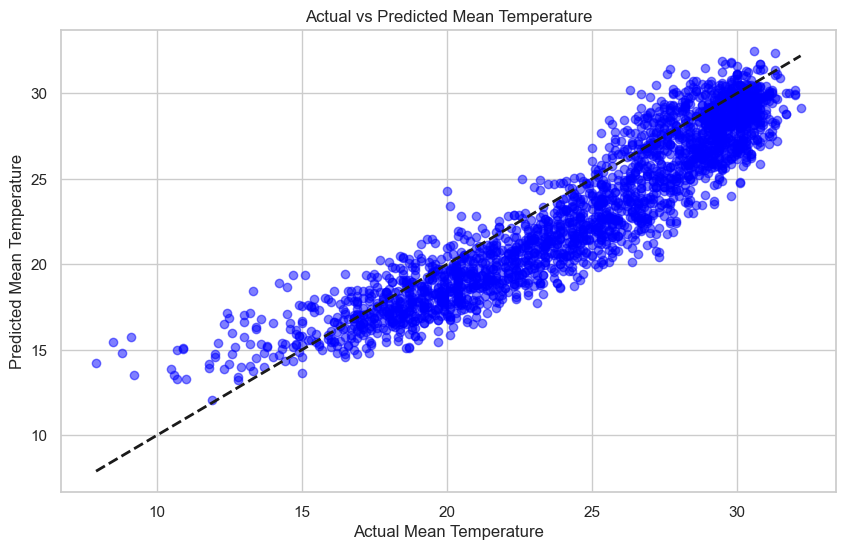

In [4]:
# plot the predictions vs the actual values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Mean Temperature')
plt.ylabel('Predicted Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.show()

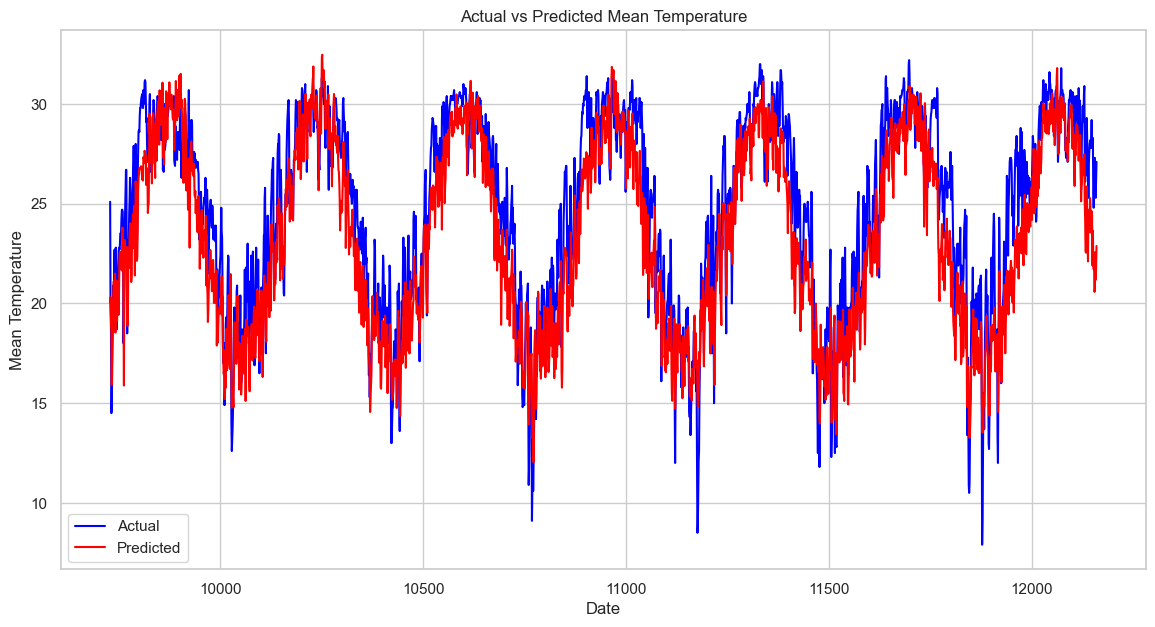

In [5]:
# time series plot
plt.figure(figsize=(14, 7))
plt.plot(tem_test.index, y_test, label='Actual', color='blue')
plt.plot(tem_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.legend()
plt.show()


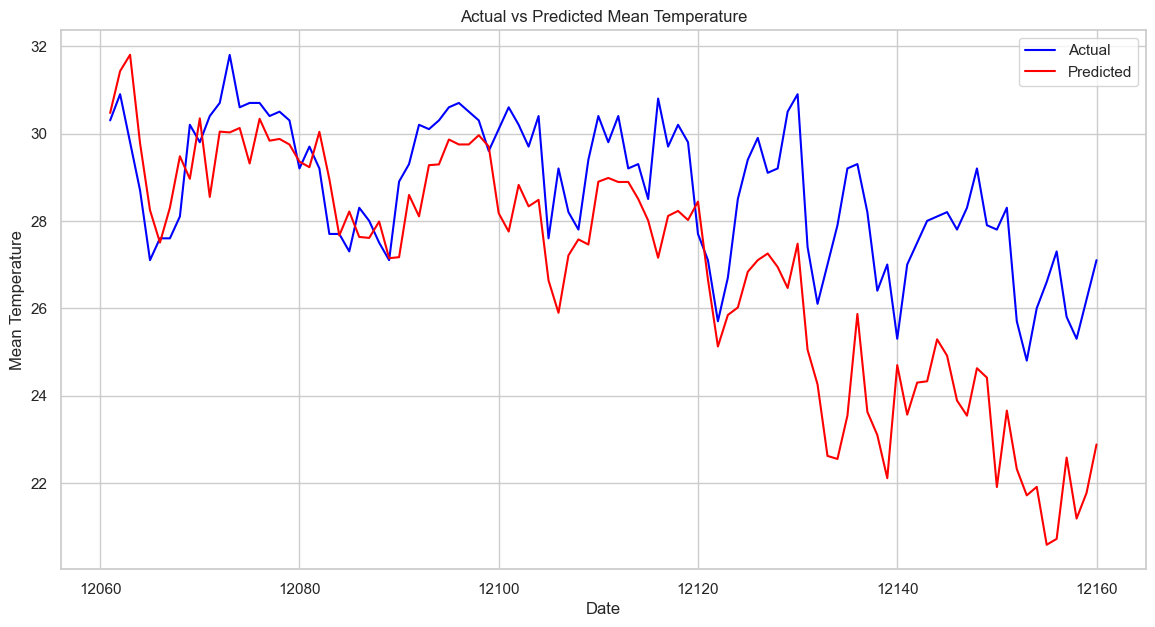

In [6]:
# time series plot last 10 days
plt.figure(figsize=(14, 7))
plt.plot(tem_test.index[-100:], y_test[-100:], label='Actual', color='blue')
plt.plot(tem_test.index[-100:], y_pred[-100:], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.legend()
plt.show()